## 證券分析與企業評價 - 作業4, B036060012 政經大四 劉百耀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  (1)選一檔股票分析此股票過去三年報酬率來自股息殖利率+盈餘成長率或本益比變動率(%)的比率

In [2]:
#此表格由excel計算後而得
answer_1 = pd.read_excel("answer_1.xlsx")
answer_1

,公司,年月,公布日期,本期稅後淨利,普通股每股現金股利(元),股利率,每股盈餘（元）,本益比,證券代碼,公布日收盤價(元),分析,股利率.1,成長率,本益比變動率,股票報酬率
0,2330 台積電,2013-12-31,2014-03-31,188146790,3.0,NaN,7.26,14.407713,2330 台積電,104.60,NaN,0.034267,0.091462,0.131907,0.235231
1,2330 台積電,2014-12-31,2015-03-31,263881771,4.5,0.022845,10.18,12.899804,2330 台積電,131.32,NaN,NaN,NaN,NaN,NaN
2,2330 台積電,2015-12-31,2016-03-31,306573837,6.0,0.034267,11.82,12.763113,2330 台積電,150.86,NaN,NaN,NaN,NaN,NaN
3,2330 台積電,2016-12-30,2017-03-31,334247180,7.0,0.045690,12.89,14.189294,2330 台積電,182.90,NaN,NaN,NaN,NaN,NaN
4,2330 台積電,2017-12-29,2018-03-31,343111476,8.0,0.053305,13.23,18.707483,2330 台積電,247.50,NaN,NaN,NaN,NaN,NaN


In [3]:
answer_1 = answer_1[['股利率.1', '成長率', '本益比變動率', '股票報酬率']]
answer_1.columns = ['股利率', '成長率', '本益比變動率', '股票報酬率']
answer_1.iloc[0, :]

股利率       0.034267
成長率       0.091462
本益比變動率    0.131907
股票報酬率     0.235231
Name: 0, dtype: float64

將上述的股利率、成長率、本益比變動率加總後所得的值等於0.257636，與股票報酬率0.235231相差沒有太遠，其中股票報酬來自於本益比變動率的貢獻最大，其次為成長率與股利率

### (2)測試一下以下投資策略：每年5月15日跟據當天股價與第一季公告財報，找出一檔符合下述三個條件股票買進:
> 1. 預估現金股息殖利率4%以上；
> 2. TTM PE在15或TTM PEG在1以下
> 3. 第一季公布EPS 同比成長

### 如此操作三年請測試績效！

**說明:**
1. 以下使用資料為2014年第一季至2017年第一季財報與股價資料，使用資料之公司為「上市公司」。
2. 使用的交易策略:預估現金股息殖利率6%以上者、TTM PE在15以下、當季EPS同比成長大於10%者(且不為負)共三個條件。
3. 進出場條件：當上述三個條件都符合時才進場，進場日期使用財報公佈日當天或公布後最接近公布日的日期進場，出場則是當上述條件任何一個只要不符合時則出場，出場時間則同樣以財報公布日或公布後最接近的日期出場，若都符合條件則持續持有直到條件不符合為止，由於回測時間為3年，因此2017年第一季財報公布日淨空手上持有部位計算報酬。

In [4]:
#以下表格交易表格是經整裡後的結果，過程在Data Prprocess與Main當中，以下僅呈現部分表格
trading_table = pd.read_csv("Result-revised.csv")
trading_table.head()

,Company,Industry,Code,Year,Season,announce_day,Date,TTM_PE,EPS_growth,Expeceted_Dividend_Rate,Position,Close,Position_new,Code_out,Date_out,Close_out,Return,holding_days,Daily_Return_geometry,Daily_Return_arithmetic
0,1109 信大,水泥工業,1109,2014,2,2014-08-14,2014-08-14,14.5475,0.625000,0.076025,1.0,12.94,1.0,1109,2015-03-31,13.47,0.040958,229,0.000175,0.000179
1,1215 卜蜂,食品工業,1215,2016,1,2016-05-15,2016-05-16,6.6925,0.319444,0.062150,1.0,26.21,1.0,1215,2017-05-15,55.57,1.120183,364,0.002067,0.003077
2,1229 聯華,食品工業,1229,2015,2,2015-08-14,2015-08-14,10.8825,0.555556,0.061925,1.0,15.64,1.0,1229,2015-11-16,15.90,0.016624,94,0.000175,0.000177
3,1229 聯華,食品工業,1229,2016,1,2016-05-15,2016-05-16,11.6975,0.151515,0.064525,1.0,16.56,1.0,1229,2016-08-15,18.26,0.102657,91,0.001074,0.001128
4,1229 聯華,食品工業,1229,2016,4,2017-03-31,2017-03-31,11.2900,4.600000,0.061150,1.0,22.90,1.0,1229,2017-05-15,23.98,0.047162,45,0.001025,0.001048


In [5]:
#年化算術平均報酬
year_return_arithmetic = (trading_table["Daily_Return_arithmetic"] *252).mean()

#年化幾何平均報酬
year_return_geometry = (((1 + trading_table["Daily_Return_geometry"]) ** (252)) - 1).mean()

table = pd.DataFrame([{"year_return_arithmetic" : year_return_arithmetic, 
             "year_return_geometry" : year_return_geometry, 
             "average_holding_day" : trading_table.holding_days.mean(), 
             "total_trade_num" : len(trading_table),
             "winning_rate" : len(trading_table[trading_table.Return > 0]) / len(trading_table)}]).T

#交易相關資訊表格
table.columns = ["values"]
table

,values
average_holding_day,178.796825
total_trade_num,315.000000
winning_rate,0.641270
year_return_arithmetic,0.087304
year_return_geometry,0.103426


上表提供回測結果的相關資訊，三年內共315筆交易，平均持股天數約為179天，勝率為6成4，算術平均的年化報酬約為8.7%，下圖則為年畫報酬的分布圖：

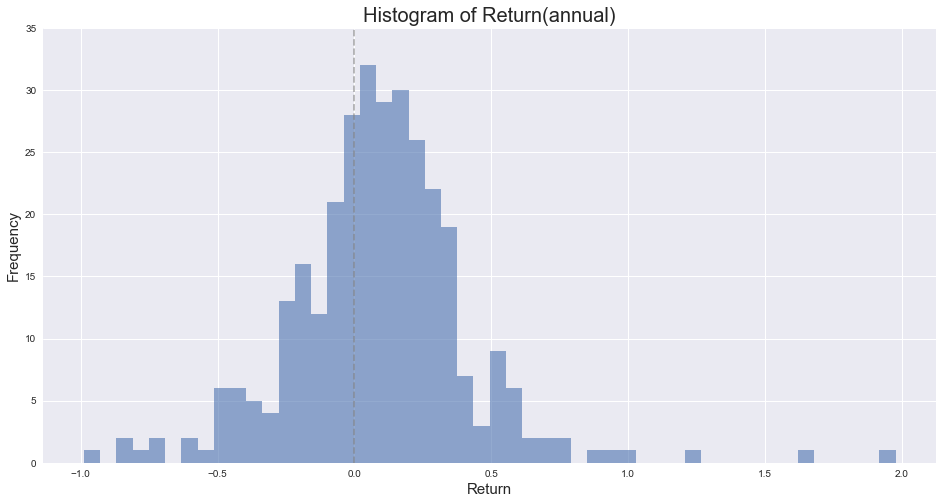

In [6]:
plt.style.use('seaborn')
fig = plt.figure(figsize = (16, 8))
plt.hist(trading_table.Daily_Return_arithmetic * 252, bins = 50, alpha = 0.6)
plt.plot(np.zeros(36), np.arange(0, 36), c = "grey", ls = "--", alpha = 0.6)
plt.ylim(0, 35)
plt.title("Histogram of Return(annual)", fontsize = 20)
plt.xlabel("Return", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15);

下圖為不同持有天數之報酬分布圖：

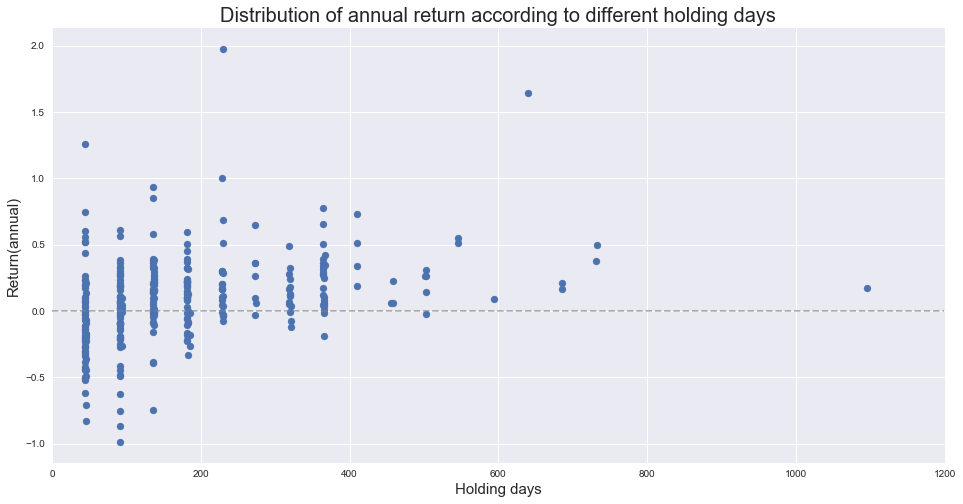

In [7]:
fig = plt.figure(figsize = (16, 8))
plt.scatter(trading_table.holding_days, trading_table.Daily_Return_arithmetic * 252)
plt.plot(np.arange(0, 1200), np.zeros(1200), c = "grey", ls = "--", alpha = 0.6)
plt.xlim(0, 1200)
plt.title("Distribution of annual return according to different holding days", fontsize = 20)
plt.xlabel("Holding days", fontsize = 15)
plt.ylabel("Return(annual)", fontsize = 15);

In [8]:
#整理清單畫不同持有期間之勝率圖，由於進場日期的些微差異將導致同樣持有區間者可能有不同持有天數，因此以下要處理
count = pd.DataFrame({"win_num" : trading_table.groupby("holding_days").apply(lambda x : (x.Return > 0).sum()), 
                      "total_num" : trading_table.groupby("holding_days").apply(lambda x : len(x)), 
                      "Return" : trading_table.groupby("holding_days").apply(lambda x : x.Daily_Return_arithmetic.mean()*252)})
count.reset_index(inplace = True)
count["index_A"] = count.holding_days / 30
count["index_B"] = count.index_A.diff()
count.loc[count["index_B"] > 0.4, "index_B"] = np.arange(1, (count["index_B"] > 0.4).sum() + 1)
count.loc[0, "index_A"] = 0

temp = np.zeros(len(count))
for i in range(len(count)):
    if ((count.loc[:, "index_B"][i] % 1) != 0):
        temp[i] = temp[i - 1]
    else:
        temp[i] = count.loc[:, "index_B"][i]
count["index_B"] = temp

final_winning_rate = pd.DataFrame({"holding_days" : count.groupby("index_B").apply(lambda x : x.holding_days.mean()), 
                                   "winning_rate" : count.groupby("index_B").apply(lambda x : x.win_num.sum() / x.total_num.sum())})

C:\Users\andy5\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


下圖為不同持有天數之勝率與報酬情形，可以發現持有期間越長者勝率較高，報酬則沒有明顯提升(圖中紅色突起的點為單筆交易下的結果，當筆交易剛好報酬特別高)。

In [9]:
# fig = plt.figure(figsize = (16, 8))

# ax1 = fig.add_subplot(111)
# ax1.plot(final_winning_rate.holding_days, final_winning_rate.winning_rate)
# ax1.scatter(final_winning_rate.holding_days, final_winning_rate.winning_rate)
# plt.ylabel("Winning rate", fontsize = 15)
# ax1.legend(["Winning rate"], loc = (0.01, 0.9), fontsize = 15)
# plt.plot(np.arange(0, 1200), [0.5] * 1200, c = "black", ls = "--", alpha = 0.6)


# ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)

# ax2.plot(final_winning_rate.holding_days, count.groupby("index_B", as_index = False).apply(lambda x : x.Return.mean()), c = "red")
# ax1.scatter(final_winning_rate.holding_days, count.groupby("index_B", as_index = False).apply(lambda x : x.Return.mean()), c = "red")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# ax2.legend(["Return"], loc = (0.01,0.86), fontsize = 15)
# plt.plot(np.arange(0, 1200), np.zeros(1200), c = "grey", ls = "--", alpha = 0.6)
# plt.xlim(0, 1200)

# plt.annotate("Winning rate : 50%", xy = (0, 0.1), xytext = (1050, 0.35), fontsize = 12)
# plt.annotate("Return(annual) : 0%", xy = (0, 0.1), xytext = (1050, 0.04), fontsize = 12)

# plt.ylabel("Return(annual)", fontsize = 15)
# plt.title("Winning rate & Return according to different holding days", fontsize = 20)
# plt.xlabel("Holding days", fontsize = 15);

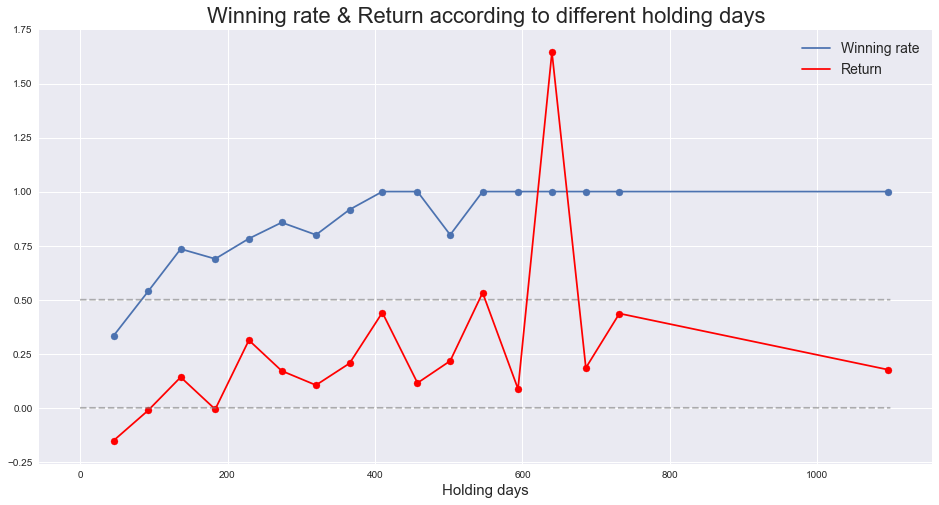

In [10]:
fig = plt.figure(figsize = (16, 8))

plt.plot(final_winning_rate.holding_days, final_winning_rate.winning_rate, label = "Winning rate")
plt.scatter(final_winning_rate.holding_days, final_winning_rate.winning_rate, label = "")
plt.plot(np.arange(0, 1100), [0.5] * 1100, c = "grey", ls = "--", alpha = 0.6)

plt.plot(final_winning_rate.holding_days, count.groupby("index_B", as_index = False).apply(lambda x : x.Return.mean()), c = "red", label = "Return")
plt.scatter(final_winning_rate.holding_days, count.groupby("index_B", as_index = False).apply(lambda x : x.Return.mean()), c = "red")
plt.plot(np.arange(0, 1100), [0] * 1100, c = "grey", ls = "--", alpha = 0.6)

plt.title("Winning rate & Return according to different holding days", fontsize = 22)
plt.xlabel("Holding days", fontsize = 15)
plt.legend(fontsize = 14);

下表則為不同天數持有期間之交易筆數，可以發現持有天數越少者交易筆數越少(勝率在交易筆數較少時參考性可能較低)。

In [11]:
pd.DataFrame({"holding_days" : count.groupby("index_B", as_index = False).apply(lambda x : x.holding_days.mean()), 
              "trade_num" : count.groupby("index_B", as_index = False).apply(lambda x : x.total_num.sum()), 
              "return" : count.groupby("index_B", as_index = False).apply(lambda x : x.Return.mean()), 
              "winning_rate" : final_winning_rate.winning_rate})

,holding_days,return,trade_num,winning_rate
0,45.500000,-0.151657,66,0.333333
1,92.333333,-0.012179,65,0.538462
2,136.500000,0.141720,49,0.734694
3,183.333333,-0.006888,45,0.688889
4,229.000000,0.312698,23,0.782609
5,273.500000,0.170862,7,0.857143
6,320.000000,0.104885,15,0.800000
7,365.500000,0.205712,24,0.916667
8,410.000000,0.440544,4,1.000000
9,457.666667,0.114822,3,1.000000


**檢討:**

進出場條件或許可以再嚴苛一些，例如：EPS要同比成長連續兩期才予以進場，出場條件或許可以等連續兩期衰退才出場，這樣應該能減少整體交易筆數同時延長持有時間，但一切還是要回測才能得知。(2018/4/22)

選股條件變得更嚴謹後(預期股息率6%、EPS同比成長10%)報酬與勝率提升許多，年化報酬由3.6%提高至8.7%，勝率由57%提高至64%，平均持有天數則由170天提升至179天，總交易筆數則由721筆降至315筆，減少一半以上的交易筆數，但勝率同時提高，報酬也提高1倍以上，因此變得更嚴謹的選股方式(濾掉一些會帶來負報酬的股票)能提升獲利。(2018/4/24)